In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplcyberpunk
plt.style.use('cyberpunk')
import missingno as mno

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
color=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap','CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b','tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight','twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter','winter_r']

In [4]:
data_train=pd.read_csv(r'C:\Users\Ashinth\Documents\courses\Kaggle\competetions\Housing-Prices\house-prices-advanced-regression-techniques\train.csv')
data_train.shape

(1460, 81)

# Looking into the data

In [5]:
price_train=data_train.SalePrice
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Input data has 80 features, which is a lot , so we have to selectively pick out the features which are   
important and those that are closely related to the data.

<AxesSubplot:>

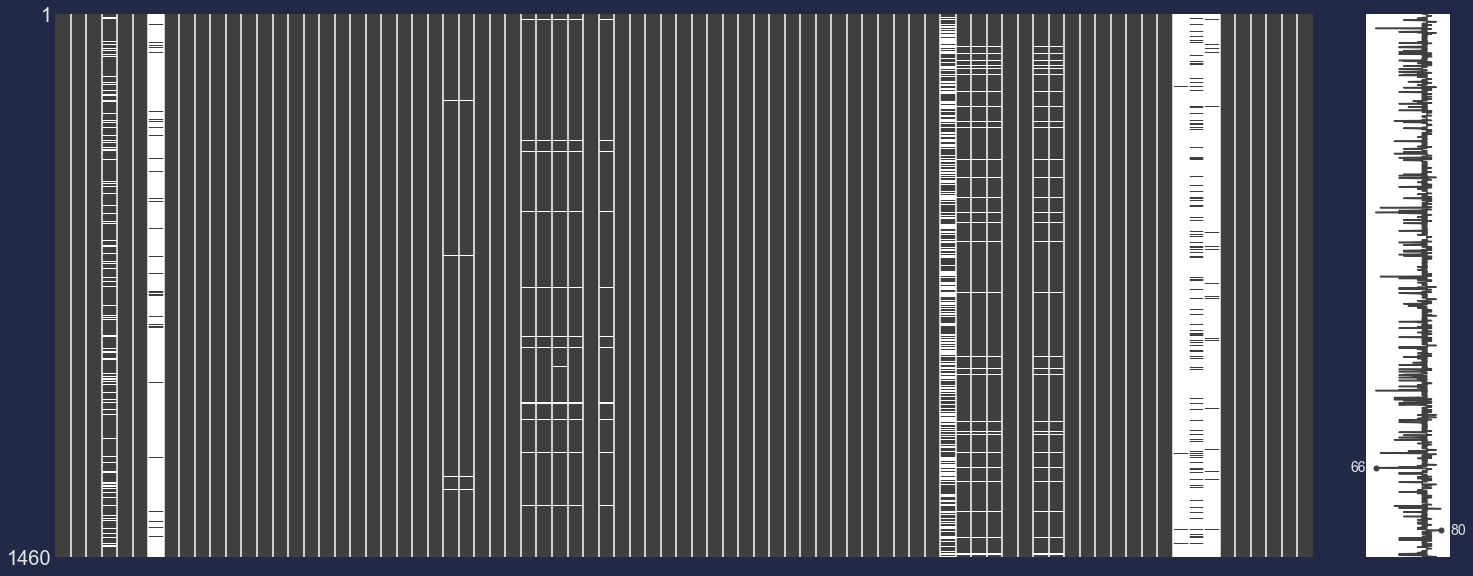

In [6]:
mno.matrix(data_train)

Looking at columns which have null values

In [7]:
null_cols= [cols for cols in data_train.columns if data_train[cols].isnull().any()]
no_of_null= data_train[null_cols].isnull().sum()


From these columns, looking at their unique values


In [8]:
for i in null_cols:
 print(i,':',data_train[i].unique())

LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley : [nan 'Grvl' 'Pave']
MasVnrType : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea : [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.6

In the columns that have missing data, some of them are categorical and some are numerical, some have nan in case where the certain feature is not present.

### Filling the missing values

Eliminating the columns which has more than 80% of null values, as filling the data in those columns would not make it more meaningful.

In [9]:
no_of_houses=data_train.shape[0]
new_null_cols=list()
remove_cols=list()
for i in range(len(null_cols)):
    if(no_of_null[i]/no_of_houses<0.8):
        new_null_cols.append(null_cols[i])
remove_cols=list(set(null_cols)-set(new_null_cols))

In [10]:
data_train[new_null_cols[3]]

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

Splitting the null columns on the basis of data types to impute the missing values.

In [11]:
float_null_cols=[cols for cols in new_null_cols if data_train[cols].dtype=='float64']
int_null_cols=[cols for cols in new_null_cols if data_train[cols].dtype=='int64' and data_train[cols].nunique()>10]
cat_train_cols=[cols for cols in new_null_cols if data_train[cols].dtype=='object']

Here there seems to be only object and float type variables, hence we can exclude int_null_cols

Filling these null values, for numeric data types as zero and categorical types as 'no' since that feature is not present

In [12]:
data_train[float_null_cols]=data_train[float_null_cols].fillna(0)
data_train[cat_train_cols]=data_train[cat_train_cols].fillna('No')
data_train.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [13]:
data_train.drop(columns=remove_cols,inplace=True)
data_train.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000


# Feature engineering

In [14]:
y=data_train.pop('SalePrice')
X=data_train

<AxesSubplot:>

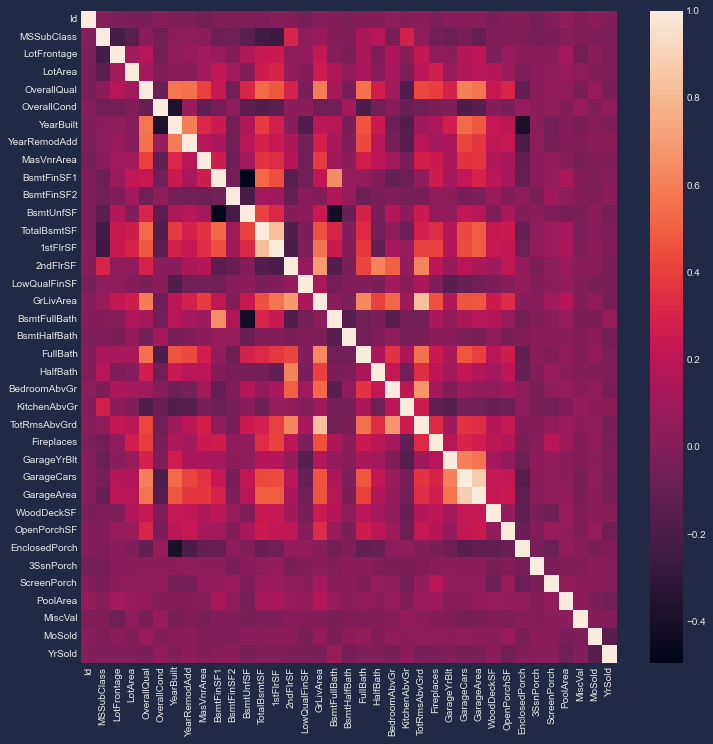

In [15]:
num_cols=[col for col in X.columns if X[col].dtype in ['float64','int64']]
hmap=X[num_cols].corr()
plt.figure(figsize=[12,12])
sns.heatmap(hmap)

In [16]:
from sklearn.feature_selection import mutual_info_regression
X.Id.dtype

dtype('int64')

In [17]:
X[num_cols].dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

Encoding the categorical variables, also here the the column names won't vanish unlike onehot encoder.

In [18]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
mi_scores=mutual_info_regression(X,y)

<BarContainer object of 76 artists>

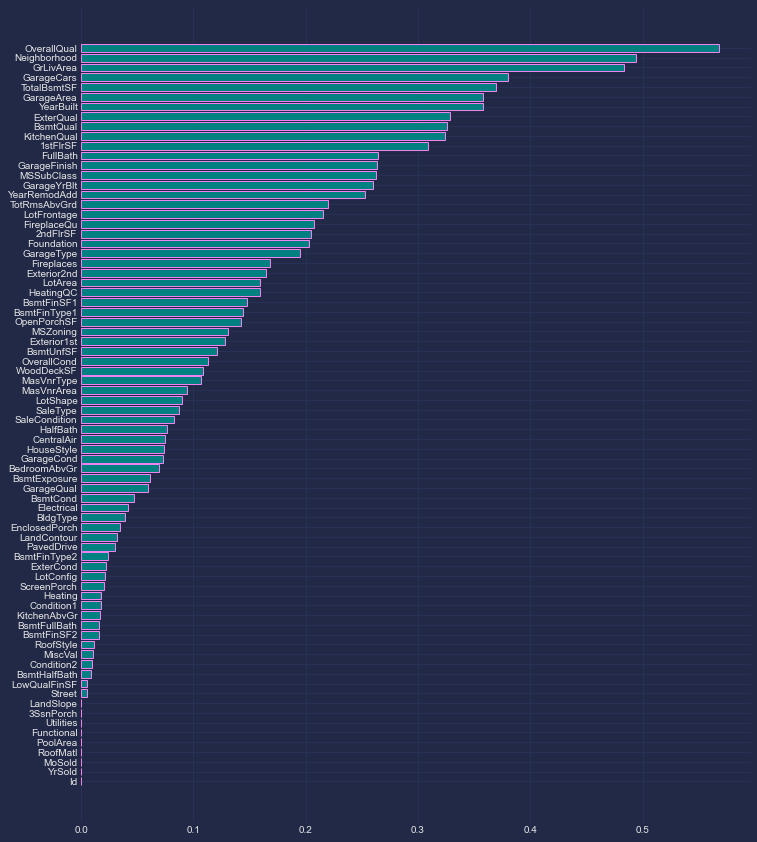

In [19]:
mi_scores=pd.Series(mi_scores,index=X.columns)
mi_scores.sort_values(ascending=True,inplace=True)
w=np.arange(len(mi_scores))
plt.figure(figsize=[12,15])
plt.yticks(w,mi_scores.index)
plt.barh(w,mi_scores,color='teal',edgecolor='violet')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

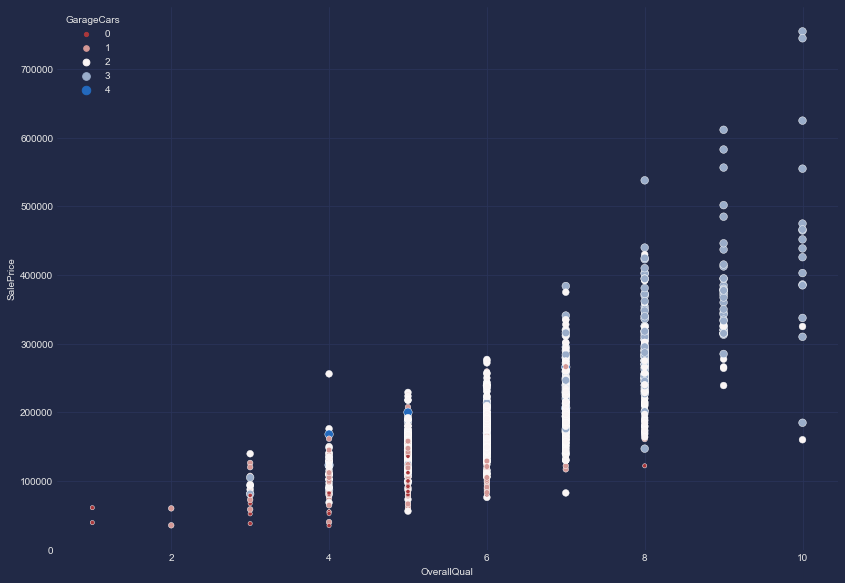

In [57]:
val=np.random.randint(0,len(color))
plt.figure(figsize=[14,10])
sns.scatterplot(x='OverallQual',y=y,data=data_train,hue='GarageCars',size='GarageCars',size_order=(100,450),palette=color[val])

Taking those features which have an MI score of more than 0

# Preprocessing

Features like xxxarea  and xxxsf have quite large values, which can be scaled.  
Also MSS subclass is a categorical feature with large numeric values, hence have to be encoded.

In [21]:
# columns with MI score of more than 0.12
selected_cols=[col for col in mi_scores.index if mi_scores[col]>0]
X=X[selected_cols]

In [22]:
from sklearn.preprocessing import MinMaxScaler
import re

In [23]:
X.MSSubClass, _=X.MSSubClass.factorize()

c:\Users\Ashinth\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Using __regrex__ to find the columns that end with __Area__ and __SF__

In [24]:
pattern='(SF|Area)\d?$'
area_columns= [col for col in X.columns if re.search(pattern,col)]

In [25]:
from sklearn.model_selection import train_test_split

Splitting the data into training and validation parts

In [26]:
X_train, X_val, y_train, y_val= train_test_split(X,y,random_state=0,test_size=0.2)

In [27]:
mms=MinMaxScaler()
X_train[area_columns]=mms.fit_transform(X_train[area_columns])
#X_train.pop('Id')
X_val[area_columns]=mms.transform(X_val[area_columns])
#X_val.pop('Id')

# Creating ML models and predicting the values of price

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Models

## 1.KNN

In [29]:
def KNN_model(neighbours):
    model=KNeighborsRegressor(n_neighbors=neighbours)
    model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    error=mean_squared_error(predictions,y_val,squared=False)
    return error

In [30]:
def KNN_predict(data):
    model=KNeighborsRegressor(n_neighbors=parameter)
    model.fit(X_train,y_train)
    predictions=model.predict(data)
    return predictions

## 2.Linear, Ridge, Lasso regression

In [31]:
def Linear_model():
    model=LinearRegression()
    model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    #error=mean_squared_error(predictions,y_val,squared=False)
    return predictions

In [32]:
def Linear_predict(data):
    model=LinearRegression()
    model.fit(X_train,y_train)
    predictions=model.predict(data)
    return predictions

In [33]:
def Ridge_model(alpha):
    model=Ridge(alpha=alpha)
    model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    error=mean_squared_error(predictions,y_val,squared=False)
    return error

In [34]:
def Ridge_predict(data):
    model=Ridge(alpha=parameter)
    model.fit(X_train,y_train)
    predictions=model.predict(data)
    return predictions

In [35]:
def Lasso_model(alpha):
    model=Lasso(alpha=alpha)
    model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    error=mean_squared_error(predictions,y_val,squared=False)
    return error

In [36]:
def KNN_predict(data):
    model=Lasso(alpha=parameter)
    model.fit(X_train,y_train)
    predictions=model.predict(data)
    return predictions

## 3.SVR

In [37]:
def SVR_model(C):
    model=SVR(C=C)
    model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    error=mean_squared_error(predictions,y_val,squared=False)
    return error

In [38]:
def SVR_predict(data):
    model=SVR(C=parameter)
    model.fit(X_train,y_train)
    predictions=model.predict(data)
    return predictions

## 4.Decision Tree

In [39]:
def Tree_model(max_depth):
    model=DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    error=mean_squared_error(predictions,y_val,squared=False)
    return error

In [40]:
def Tree_predict(data):
    model=DecisionTreeRegressor(max_depth=parameter)
    model.fit(X_train,y_train)
    predictions=model.predict(data)
    return predictions

## 5.Random Forests

In [41]:
def forest_model(depth):
    model=RandomForestRegressor(n_estimators=20,max_depth=depth,max_features=25)
    model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    error=mean_squared_error(predictions,y_val,squared=False)
    return error

In [42]:
def forest_predict(data):
    model=RandomForestRegressor(max_depth=parameter,n_estimators=20,max_features=25)
    model.fit(X_train,y_train)
    predictions=model.predict(data)
    return predictions

## 6.XBGRegressor

In [68]:
def XGB_model(lda):
    model=XGBRegressor(n_estimators=150,reg_lambda=lda,learning_rate=0.1,max_depth=8)
    model.fit(X_train,y_train)
    predictions=model.predict(X_val)
    error=mean_squared_error(predictions,y_val,squared=False)
    return error

In [71]:
def XGB_predict(data):
    model=XGBRegressor(n_estimators=150,reg_lambda=parameter,learning_rate=0.1,max_depth=8)
    model.fit(X_train,y_train)
    predictions=model.predict(data)
    return predictions

## Predicting values for validation data

<AxesSubplot:ylabel='SalePrice'>

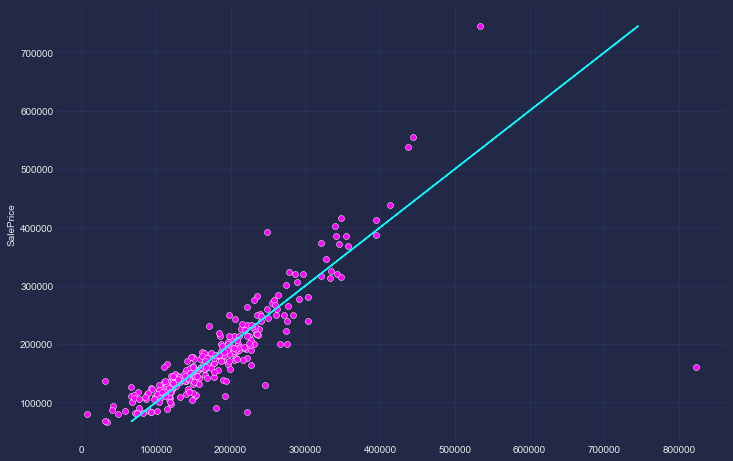

In [63]:
predictors=Linear_model()
plt.figure(figsize=[12,8])
val=np.random.randint(0,len(color))
plt.plot(y_val,y_val,'-',)
sns.scatterplot(x=predictors,y=y_val,color='magenta')

In [69]:
value=[2,4,5,7,8,9,10,25]
#value=[1]
score=dict()
for i in value:
   score[i]=XGB_model(i)
score

{2: 28280.954430024,
 4: 28676.547256402322,
 5: 28607.2014130125,
 7: 27561.2180931769,
 8: 29000.847538504833,
 9: 30234.574546872598,
 10: 28861.332975498295,
 25: 30461.63682744687}

In [70]:
value=list(score.values())
keys=list(score.keys())
min_val=(min(value))
min_index=value.index(min_val)
parameter=keys[min_index]

# Changing the test data and generating price predictions

In [72]:
data_test=pd.read_csv(r'C:\Users\Ashinth\Documents\courses\Kaggle\competetions\Housing-Prices\house-prices-advanced-regression-techniques\test.csv')

In [49]:
data_test[float_null_cols]=data_train[float_null_cols].fillna(0)
data_test[cat_train_cols]=data_train[cat_train_cols].fillna('No')

In [50]:
data_test.drop(columns=remove_cols,inplace=True)
X_test=data_test
X_test.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,65.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,80.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,68.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,60.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,84.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
5,1466,60,RL,85.0,10000,Pave,IR1,Lvl,AllPub,Corner,...,84,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,75.0,7980,Pave,IR1,Lvl,AllPub,Inside,...,21,0,0,0,0,500,3,2010,WD,Normal


In [51]:
indices=X_test.Id

In [52]:
for colname in X_test.select_dtypes("object"):
    X_test[colname], _ = X_test[colname].factorize()

In [53]:
X_test=X_test[selected_cols]
X_test.MSSubClass, _=X_test.MSSubClass.factorize()
X_test[area_columns]=mms.transform(X_test[area_columns])

c:\Users\Ashinth\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
c:\Users\Ashinth\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [73]:
test_predictions=XGB_predict(X_test)

In [74]:
test_result=pd.DataFrame(zip(indices,test_predictions),columns=('Id','SalePrice'),index=indices)

In [75]:
test_result.to_csv('House_prices.csv',index=False)